In [1]:
!pip uninstall opencv-python
!pip uninstall opencv-contrib-python


In [ ]:


!pip install opencv-contrib-python
!pip install opencv-python

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

In [2]:
#Image CLASS-ID SPECIES BREED ID
#ID: 1:37 Class ids
#SPECIES: 1:Cat 2:Dog
#BREED ID: 1-25:Cat 1:12:Dog
#All images with 1st letter as captial are cat images
#images with small first letter are dog images

df = pd.read_csv('./data/annotations/list.txt', skiprows=6, delimiter=' ', header=None)
df.columns = ['file_name', 'id', 'species', 'breed']
df

,file_name,id,species,breed
0,Abyssinian_100,1,1,1
1,Abyssinian_101,1,1,1
2,Abyssinian_102,1,1,1
3,Abyssinian_103,1,1,1
4,Abyssinian_104,1,1,1
...,...,...,...,...
7344,yorkshire_terrier_96,37,2,25
7345,yorkshire_terrier_97,37,2,25
7346,yorkshire_terrier_98,37,2,25
7347,yorkshire_terrier_99,37,2,25


In [3]:
df['species'].value_counts().sort_index()

1    2371
2    4978
Name: species, dtype: int64

In [4]:
print(df['species'].value_counts().sort_index())

1    2371
2    4978
Name: species, dtype: int64


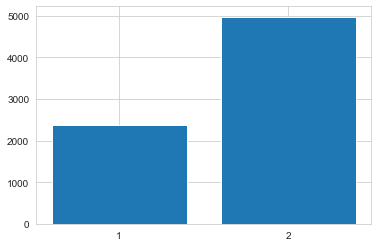

In [5]:
value_counts = df['species'].value_counts().sort_index()

plt.bar(range(len(value_counts)), value_counts.values, align='center')
plt.xticks(range(len(value_counts)), value_counts.index.values)

plt.show()

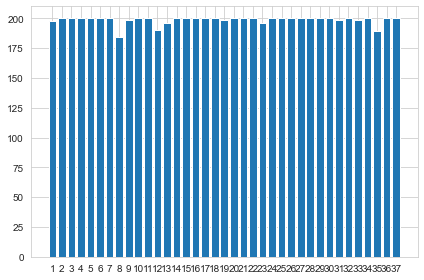

In [6]:
value_counts = df['id'].value_counts().sort_index()

plt.bar(range(len(value_counts)), value_counts.values, align='center')
plt.xticks(range(len(value_counts)), value_counts.index.values)

plt.tight_layout()
plt.show()

In [7]:
# df[df['species'] == 1]['breed'].value_counts()
df[df['species'] == 1]['breed'].value_counts()

2     200
8     200
10    200
12    200
3     200
5     200
7     200
9     200
11    199
1     198
6     190
4     184
Name: breed, dtype: int64

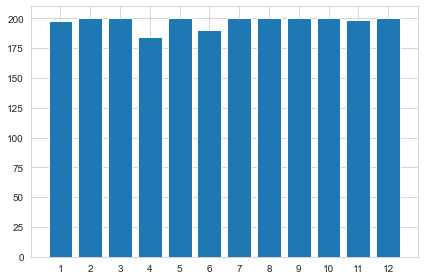

In [8]:
value_counts = df[df['species'] == 1]['breed'].value_counts().sort_index()

plt.bar(range(len(value_counts)), value_counts.values, align='center')
plt.xticks(range(len(value_counts)), value_counts.index.values)

plt.tight_layout()
plt.show()

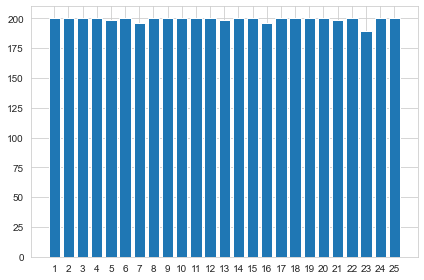

In [9]:
value_counts = df[df['species'] == 2]['breed'].value_counts().sort_index()

plt.bar(range(len(value_counts)), value_counts.values, align='center')
plt.xticks(range(len(value_counts)), value_counts.index.values)

plt.tight_layout()
plt.show()

In [10]:
import os
from glob import glob

In [11]:
image_dir = 'data/images/'
bbox_dir = 'data/annotations/xmls/'
seg_dir = 'data/annotations/trimaps/'

In [12]:
image_files = glob(image_dir + '*.jpg')
len(image_files)

7390

In [13]:
image_files[:10]

['data/images\\Abyssinian_1.jpg',
 'data/images\\Abyssinian_10.jpg',
 'data/images\\Abyssinian_100.jpg',
 'data/images\\Abyssinian_101.jpg',
 'data/images\\Abyssinian_102.jpg',
 'data/images\\Abyssinian_103.jpg',
 'data/images\\Abyssinian_104.jpg',
 'data/images\\Abyssinian_105.jpg',
 'data/images\\Abyssinian_106.jpg',
 'data/images\\Abyssinian_107.jpg']

In [21]:
seg_files = glob(seg_dir + '*.png')
len(seg_files)

7390

In [22]:
seg_files[:10]

['data/annotations/trimaps\\Abyssinian_1.png',
 'data/annotations/trimaps\\Abyssinian_10.png',
 'data/annotations/trimaps\\Abyssinian_100.png',
 'data/annotations/trimaps\\Abyssinian_101.png',
 'data/annotations/trimaps\\Abyssinian_102.png',
 'data/annotations/trimaps\\Abyssinian_103.png',
 'data/annotations/trimaps\\Abyssinian_104.png',
 'data/annotations/trimaps\\Abyssinian_105.png',
 'data/annotations/trimaps\\Abyssinian_106.png',
 'data/annotations/trimaps\\Abyssinian_107.png']

In [23]:
bbox_files = glob(bbox_dir + '*.xml')
len(bbox_files)

3686

In [24]:
bbox_files[:10]

['data/annotations/xmls\\Abyssinian_1.xml',
 'data/annotations/xmls\\Abyssinian_10.xml',
 'data/annotations/xmls\\Abyssinian_100.xml',
 'data/annotations/xmls\\Abyssinian_101.xml',
 'data/annotations/xmls\\Abyssinian_102.xml',
 'data/annotations/xmls\\Abyssinian_103.xml',
 'data/annotations/xmls\\Abyssinian_105.xml',
 'data/annotations/xmls\\Abyssinian_106.xml',
 'data/annotations/xmls\\Abyssinian_107.xml',
 'data/annotations/xmls\\Abyssinian_108.xml']

In [25]:
import cv2
# import opencv as cv2
import xml.etree.ElementTree as et
from matplotlib.patches import Rectangle

In [26]:
image_dir, image_files[110]

('data/images/', 'data/images\\Abyssinian_212.jpg')

In [27]:
image_path = image_files[110]
bbox_path = image_path.replace(image_dir, bbox_dir).replace('jpg', 'xml')

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

tree = et.parse(bbox_path)

xmin = float(tree.find('./object/bndbox/xmin').text)
xmax = float(tree.find('./object/bndbox/xmax').text)
ymin = float(tree.find('./object/bndbox/ymin').text)
ymax = float(tree.find('./object/bndbox/ymax').text)

rect_x = xmin
rect_y = ymin
rect_w = xmax - xmin
rect_h = ymax - ymin

rect = Rectangle((rect_x, rect_y), rect_w, rect_h, fill=False, color='red')
plt.axes().add_patch(rect)
plt.imshow(image)

plt.show()

AttributeError: module 'cv2' has no attribute 'imread'

In [58]:
image_path = image_files[110]
seg_path = image_path.replace(image_dir, seg_dir).replace('jpg', 'png')

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
seg_map = cv2.imread(seg_path, cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.imshow(seg_map)

plt.show()

AttributeError: module 'cv2' has no attribute 'imread'

In [34]:
from sklearn.model_selection import KFold

In [38]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

df['fold'] = -1
for idx, (t, v) in enumerate(kf.split(df), 1):
    print(t, v, len(v))
    df.loc[v, 'fold'] = idx

[   1    2    3 ... 7346 7347 7348] [   0    8   14 ... 7339 7341 7345] 1470
[   0    1    2 ... 7346 7347 7348] [  12   15   26 ... 7340 7342 7344] 1470
[   0    1    2 ... 7345 7346 7348] [   6    7   18 ... 7333 7343 7347] 1470
[   0    3    4 ... 7345 7347 7348] [   1    2   10 ... 7335 7336 7346] 1470
[   0    1    2 ... 7345 7346 7347] [   3    4    5 ... 7334 7338 7348] 1469


In [40]:
print(len(df[df['fold'] == 1]))
print(len(df[df['fold'] != 1]))

1470
5879


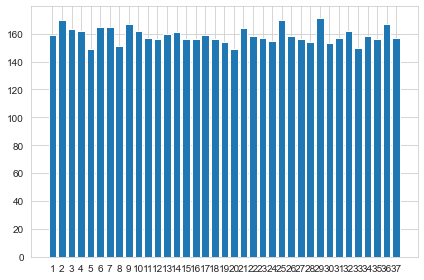

In [42]:
value_counts = df[df['fold'] != 5]['id'].value_counts().sort_index()

plt.bar(range(len(value_counts)), value_counts.values, align='center')
plt.xticks(range(len(value_counts)), value_counts.index.values)

plt.tight_layout()
plt.show()

In [43]:
from sklearn.model_selection import StratifiedKFold

In [44]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

df['fold'] = -1
for idx, (t, v) in enumerate(skf.split(df, df['id']), 1):
    print(t, v, len(v))
    df.loc[v, 'fold'] = idx

[   0    1    3 ... 7346 7347 7348] [   2    7    8 ... 7326 7337 7345] 1470
[   1    2    3 ... 7346 7347 7348] [   0   12   13 ... 7323 7335 7339] 1470
[   0    2    3 ... 7345 7347 7348] [   1   14   19 ... 7341 7343 7346] 1470
[   0    1    2 ... 7346 7347 7348] [   3    4    5 ... 7334 7338 7342] 1470
[   0    1    2 ... 7343 7345 7346] [   9   21   23 ... 7344 7347 7348] 1469


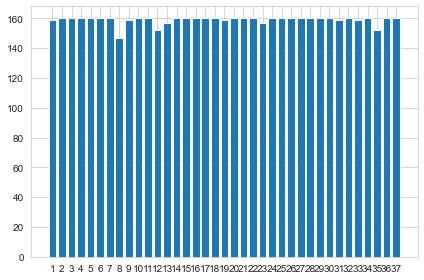

In [45]:
value_counts = df[df['fold'] != 5]['id'].value_counts().sort_index()

plt.bar(range(len(value_counts)), value_counts.values, align='center')
plt.xticks(range(len(value_counts)), value_counts.index.values)

plt.tight_layout()
plt.show()

In [46]:
df.to_csv('data/kfolds.csv', index=False)